In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_stata("stanford data set/HCMST 2017 fresh sample for public sharing draft v1.1.dta")

In [4]:
df[["age_when_met", "S1"]].head(n=100)

,age_when_met,S1
0,30.0,"No, I am not Married"
1,21.0,"Yes, I am Married"
2,36.0,"Yes, I am Married"
3,23.0,"No, I am not Married"
4,25.0,"Yes, I am Married"
...,...,...
95,19.0,"Yes, I am Married"
96,16.0,"No, I am not Married"
97,18.0,"Yes, I am Married"
98,56.0,"Yes, I am Married"


# Déterminer la compatiblité amoureuse en pourcentage en prennant en compte certains paramètres

In [3]:
df["Q34"].unique()

[NaN, 'Excellent', 'Good', 'Fair', 'Very Poor', 'Poor', 'Refused']
Categories (6, object): ['Refused' < 'Excellent' < 'Good' < 'Fair' < 'Poor' < 'Very Poor']

In [5]:
df["Q34"].value_counts()
# Transform Q34 to a numeric value

Excellent    1706
Good          884
Fair          202
Poor           32
Very Poor      23
Refused         9
Name: Q34, dtype: int64

In [6]:
# Enlever les lignes avec refused ou NaN
df = df[df["Q34"] != "Refused"]

In [15]:
# Get all the married couples
dfMarried = df[df["S1"] == "Yes, I am Married"]

In [18]:
dfMarried.head(n=100)

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0
5,9,2917189,Qualified,0.8815,69054.0,1.8263,0.8765,68663.0,0.565935,39282.0,...,no,no,no,no,White,no,12.0,12.0,16.0,12.0
6,10,2919423,Qualified,0.8381,65655.0,NaN,0.8333,65279.0,0.942260,65402.0,...,no,yes,no,no,White,no,12.0,7.5,13.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,194,2590127,Qualified,0.8029,62897.0,NaN,0.7983,62537.0,0.902683,62655.0,...,no,no,no,no,White,no,12.0,13.0,12.0,12.0
167,195,2967957,Qualified,NaN,NaN,1.9180,NaN,NaN,0.594351,41254.0,...,no,no,no,no,White,no,13.0,12.0,12.0,12.0
168,196,2884323,Qualified,0.8802,68953.0,NaN,0.8751,68553.0,0.989525,68683.0,...,no,yes,no,no,White,yes,17.0,14.0,13.0,16.0
169,197,985963,Qualified,1.0691,83751.0,NaN,1.0630,83273.0,1.201995,83431.0,...,yes,yes,yes,no,Black or African American,no,11.0,12.0,12.0,12.0


In [19]:
# Preparation des données

In [7]:
df["partner_is_female"] = (df["Q4"] == "[Partner Name] is Female").astype(int)

In [21]:
df.head(n=100)

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed,partner_is_female
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,White,no,12.0,14.0,12.0,14.0,0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,yes,White,no,12.0,16.0,17.0,17.0,0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,White,no,9.0,7.5,14.0,17.0,1
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,White,no,16.0,12.0,12.0,12.0,0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,yes,no,White,no,14.0,17.0,16.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,114,646023,Qualified,0.9264,72572.0,NaN,0.9211,72157.0,1.041540,72293.0,...,yes,no,no,White,no,12.0,12.0,12.0,12.0,0
96,115,2298757,Qualified,NaN,NaN,0.6615,NaN,NaN,0.204986,14228.0,...,yes,no,no,White,no,12.0,11.0,12.0,13.0,0
97,116,2658993,Qualified,1.1037,86461.0,NaN,1.0974,85968.0,1.240893,86131.0,...,yes,no,no,White,no,9.0,13.0,12.0,12.0,0
98,117,1586841,Qualified,NaN,NaN,1.8158,NaN,NaN,0.562681,39056.0,...,no,no,no,White,no,12.0,12.0,12.0,12.0,1


In [8]:
cols = ['age_when_met', 'ppeducat', 'ppethm', 'ppgender', 'w6_q21a_year', 'w6_q21b_year', 'w6_q21c_year', 'w6_q21d_year']

In [9]:
dfClean = df[cols]

In [10]:
dfClean.head(n=100)

,age_when_met,ppeducat,ppethm,ppgender,w6_q21a_year,w6_q21b_year,w6_q21c_year,w6_q21d_year
0,30.0,Some college,"White, Non-Hispanic",Male,2017.0,2017.0,NaN,NaN
1,21.0,Bachelor's degree or higher,"White, Non-Hispanic",Female,1983.0,1995.0,1996.0,1996.0
2,36.0,Bachelor's degree or higher,"White, Non-Hispanic",Male,2006.0,2006.0,2006.0,2008.0
3,23.0,Less than high school,"White, Non-Hispanic",Female,2012.0,2013.0,NaN,NaN
4,25.0,Bachelor's degree or higher,"White, Non-Hispanic",Female,1983.0,1983.0,1984.0,1984.0
...,...,...,...,...,...,...,...,...
95,19.0,High school,"White, Non-Hispanic",Female,1968.0,1968.0,1970.0,1970.0
96,16.0,Some college,"White, Non-Hispanic",Male,1969.0,1969.0,1980.0,NaN
97,18.0,High school,"White, Non-Hispanic",Female,2000.0,2007.0,2007.0,2007.0
98,56.0,High school,"White, Non-Hispanic",Male,2004.0,2005.0,2005.0,2007.0


In [ ]:
for col in df.columns:
    print(col, df[col].unique())

# Get only people in a relationship

In [45]:
df["S2"].unique()

['No, I am single, with no boyfriend, no girlfr..., NaN, 'Yes, I have a sexual partner (boyfriend or gi..., 'I have a romantic partner who is not yet a se...]
Categories (3, object): ['Yes, I have a sexual partner (boyfriend or gi... < 'I have a romantic partner who is not yet a se... < 'No, I am single, with no boyfriend, no girlfr...]

In [44]:
df["partner_is_female"]

0       0
1       0
2       1
3       0
4       0
       ..
3505    0
3506    0
3507    0
3508    0
3509    0
Name: partner_is_female, Length: 3510, dtype: int64

In [12]:
df["Q34"].unique()

[NaN, 'Excellent', 'Good', 'Fair', 'Very Poor', 'Poor']
Categories (6, object): ['Refused' < 'Excellent' < 'Good' < 'Fair' < 'Poor' < 'Very Poor']

In [11]:
# Compute relation duration
date_now = pd.to_datetime("2017-01-01")
df["Q21B_Month"].unique()

[NaN, 'August', 'June', 'October', 'January', ..., 'March', 'February', 'April', 'Refused', 'December']
Length: 14
Categories (13, object): ['Refused' < 'January' < 'February' < 'March' ... 'September' < 'October' < 'November' < 'December']

In [13]:
mask = df[['Q6A', 'Q6B']].isnull().any(axis=1)
mask2 = df['S2'] == "No, I am single, with no boyfriend, no girlfriend and no romantic or sexual partner"
resultat = df[mask]
resultat2 = df[mask2]

In [14]:
# Filter out people that are in resultat and not in resultat2
resultat = resultat[~resultat["CaseID"].isin(resultat2["CaseID"])]
resultat.head(n=100)

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed,partner_is_female
849,1007,1359305,Not Qualified,NaN,NaN,NaN,0.8604,67402.0,0.972903,67529.0,...,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,12.0,0
1096,1300,2084489,Not Qualified,NaN,NaN,NaN,1.3117,102755.0,1.483214,102950.0,...,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,12.0,0
1465,1750,1836809,Not Qualified,NaN,NaN,NaN,0.7712,60414.0,0.872040,60528.0,...,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,12.0,0
1658,1999,2214307,Not Qualified,NaN,NaN,NaN,1.2118,94929.0,1.370251,95109.0,...,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,12.0,0
1790,2160,2487145,Not Qualified,NaN,NaN,NaN,0.8246,64597.0,0.932422,64720.0,...,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,13.0,0
2881,3502,2181207,Not Qualified,NaN,NaN,NaN,1.7486,136981.0,1.977242,137241.0,...,NaN,NaN,NaN,Black or African American,NaN,NaN,NaN,NaN,12.0,0


In [15]:
df["Q15A7"].unique()

[NaN, 'I met [Partner Name] in [Answer in Q15A6]', 'I met [Partner Name] somewhere else, Please s..., 'Refused']
Categories (3, object): ['Refused' < 'I met [Partner Name] in [Answer in Q15A6]' < 'I met [Partner Name] somewhere else, Please s...]

In [78]:
df["Q34"].unique()

[NaN, 'Excellent', 'Good', 'Fair', 'Very Poor', 'Poor', 'Refused']
Categories (6, object): ['Refused' < 'Excellent' < 'Good' < 'Fair' < 'Poor' < 'Very Poor']

In [16]:
df["BaseRelationScore"] = df["Q34"].map({"Excellent": 1, "Good": 0.8, "Fair": 0.5, "Poor": 0.2, "Refused": 0, "Very poor": 0})

In [17]:
df["BaseRelationScore"].unique()

array([nan, 1. , 0.8, 0.5, 0.2])

In [21]:
currentYear = 2017
df["RelationshipDuration"] = currentYear - df["Q21A_Year"]
df["RelationshipDuration"].unique()

TypeError: unsupported operand type(s) for -: 'int' and 'Categorical'

In [53]:
print(df["Q21A_Year"].unique())

[NaN, '1983', '2006', '1981', '1966', ..., '1964', '1957', '1951', '1949', '1946']
Length: 74
Categories (73, object): ['Refused' < '1939' < '1946' < '1948' ... '2014' < '2015' < '2016' < '2017']


In [18]:
df_yearMet = pd.get_dummies(df["Q21A_Year"])

In [19]:
dfTest = df[df["Q21A_Year"] != np.NAN]

In [20]:
df["yearMet"].unique()

KeyError: 'yearMet'

In [78]:
dfTest["Q21A_Year"].astype(int)

ValueError: Cannot convert float NaN to integer

In [91]:
df.iloc[3]["Q21A_Year"]

nan

In [22]:
type(df.iloc[0]["Q21A_Year"])

float

In [23]:
dfClean = df.dropna()

In [24]:
dfClean.head(n = 100)

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed,partner_is_female,BaseRelationScore


In [25]:
satisfaction_mapping = {
    'Refused': -1,
    'Excellent': 5,
    'Good': 4,
    'Fair': 3,
    'Poor': 2,
    'Very Poor': 1
}

# Replace satisfaction categories with numerical values
df['relationship_satisfaction_num'] = df['Q34'].map(satisfaction_mapping)

# Normalize relationship satisfaction (excluding 'Refused' responses)
df['relationship_satisfaction_norm'] = df[df['relationship_satisfaction_num'] != -1].apply(
    lambda row: (row['relationship_satisfaction_num'] - 1) / 4, axis=1
)

# Convert 'Q21B_Year' to numerical values
df['Q21B_Year_num'] = pd.to_numeric(df['Q21B_Year'], errors='coerce')

# Calculate relationship duration in years
study_year = 2017
df['relationship_duration'] = study_year - df['Q21B_Year_num']

# Normalize relationship duration
duration_min = df['relationship_duration'].min()
duration_max = df['relationship_duration'].max()
df['relationship_duration_norm'] = (df['relationship_duration'] - duration_min) / (duration_max - duration_min)

# Map marital status to numerical values
marital_status_mapping = {
    'No, I am not Married': 0,
    'Yes, I am Married': 1
}

df['marital_status_num'] = df['S1'].map(marital_status_mapping)

df['compatibility_score'] = 0.7 * df['relationship_satisfaction_norm'] + 0.2 * df['relationship_duration_norm'] + 0.1 * df['marital_status_num'].astype(int)

In [26]:
df["compatibility_score"].unique()

array([       nan, 0.85866667, 0.65433333, 0.89066667, 0.71833333,
       0.93333333, 0.474     , 0.641     , 0.83466667, 0.72666667,
       0.84      , 0.82933333, 0.73966667, 0.716     , 0.84533333,
       0.872     , 0.70533333, 0.525     , 0.36866667, 0.808     ,
       0.90666667, 0.67033333, 0.35      , 0.848     , 0.87733333,
       0.70266667, 0.7       , 0.62766667, 0.92266667, 0.85333333,
       0.80933333, 0.93066667, 0.649     , 0.708     , 0.124     ,
       0.55966667, 0.92      , 0.54333333, 0.952     , 0.87466667,
       0.96      , 0.53833333, 0.88      , 0.88533333, 0.65966667,
       0.48466667, 0.82666667, 0.816     , 0.546     , 0.93866667,
       0.71333333, 0.50866667, 0.653     , 0.65166667, 0.832     ,
       0.73433333, 0.68633333, 0.73466667, 0.81066667, 0.74233333,
       0.75833333, 0.92533333, 0.76633333, 0.689     , 0.48733333,
       0.90933333, 0.54366667, 0.912     , 0.94933333, 0.84266667,
       0.82133333, 0.95733333, 0.47666667, 0.86933333, 0.856  

[NaN, 5, 4, 3, 1, 2, -1]
Categories (6, int64): [-1 < 5 < 4 < 3 < 2 < 1]

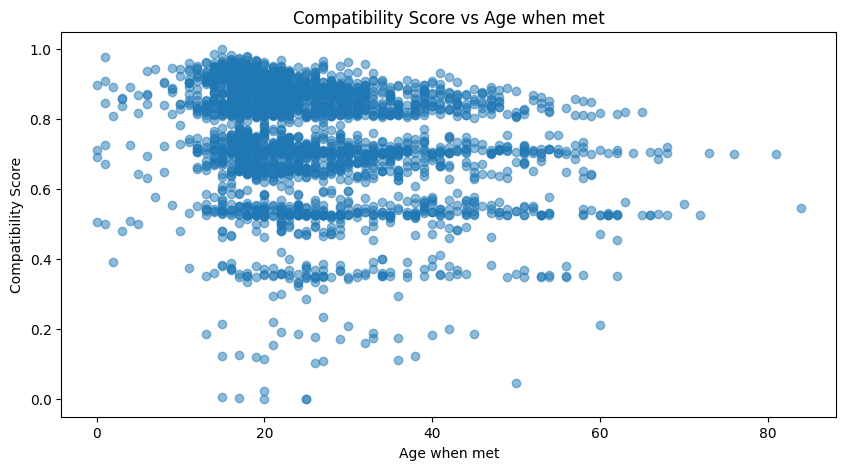

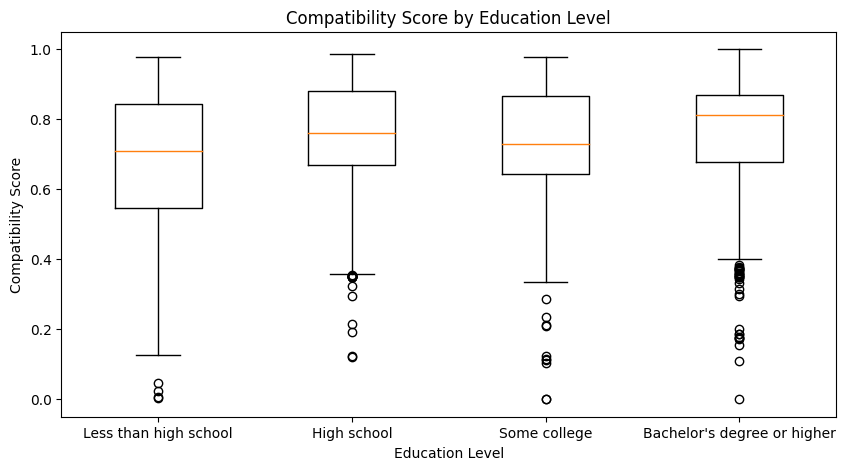

In [49]:
# Scatter plot of compatibility_score vs age_when_met
plt.figure(figsize=(10, 5))
plt.scatter(df['age_when_met'], df['compatibility_score'], alpha=0.5)
plt.xlabel('Age when met')
plt.ylabel('Compatibility Score')
plt.title('Compatibility Score vs Age when met')
plt.show()

# Box plot of compatibility_score by education level
education_levels = ['Less than high school', 'High school', 'Some college', "Bachelor's degree or higher"]
df['subject_education'] = df['ppeducat']

boxplot_data = [df.loc[df['subject_education'] == level, 'compatibility_score'].dropna() for level in education_levels]

plt.figure(figsize=(10, 5))
plt.boxplot(boxplot_data, labels=education_levels)
plt.xlabel('Education Level')
plt.ylabel('Compatibility Score')
plt.title('Compatibility Score by Education Level')
plt.show()

In [23]:
df.columns

Index(['CaseID', 'CASEID_NEW', 'qflag', 'weight1', 'weight1_freqwt', 'weight2',
       'weight1a', 'weight1a_freqwt', 'weight_combo', 'weight_combo_freqwt',
       ...
       'subject_mother_yrsed', 'partner_yrsed', 'subject_yrsed',
       'relationship_satisfaction_num', 'relationship_satisfaction_norm',
       'Q21B_Year_num', 'relationship_duration', 'relationship_duration_norm',
       'compatibility_score', 'subject_education'],
      dtype='object', length=292)

In [22]:
df['S1'].unique()

['No, I am not Married', 'Yes, I am Married']
Categories (2, object): ['Yes, I am Married' < 'No, I am not Married']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Sélection des caractéristiques d'intérêt
features = [
    'Q5', 'Q6B', 'Q9', 'Q10', 'w6_how_many',
    'ppeduc', 'ppage', 'ppgender', 'pphhsize'
]
target = 'compatibility_score'

dfClean = df[features + [target]]

# Gestion des valeurs manquantes
dfClean = dfClean.dropna()

# Encodage des variables catégorielles
cat_features = ['Q5', 'Q6B', 'Q10', 'ppeduc', 'ppgender', 'w6_how_many']
enc = OneHotEncoder()
encoded_features = enc.fit_transform(dfClean[cat_features]).toarray()
encoded_feature_names = enc.get_feature_names_out(cat_features)

df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=dfClean.index)
dfClean = pd.concat([dfClean.drop(cat_features, axis=1), df_encoded], axis=1)

# Division des données en ensembles d'entraînement et de test
X = dfClean.drop(target, axis=1)
y = dfClean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
df

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,subject_yrsed,partner_is_female,BaseRelationScore,relationship_satisfaction_num,relationship_satisfaction_norm,Q21B_Year_num,relationship_duration,relationship_duration_norm,marital_status_num,compatibility_score
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,17.0,0,1.0,5,1.00,1995.0,22.0,0.293333,1,0.858667
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,17.0,1,0.8,4,0.75,2006.0,11.0,0.146667,1,0.654333
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,16.0,0,1.0,5,1.00,1983.0,34.0,0.453333,1,0.890667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,4304,1228389,Qualified,NaN,NaN,0.6463,NaN,NaN,0.200276,13901.0,...,17.0,0,1.0,5,1.00,2015.0,2.0,0.026667,1,0.805333
3506,4305,2480357,Qualified,NaN,NaN,1.1856,NaN,NaN,0.367395,25501.0,...,16.0,0,0.8,4,0.75,2017.0,0.0,0.000000,0,0.525000
3507,4307,2090075,Qualified,NaN,NaN,0.7724,NaN,NaN,0.239352,16613.0,...,16.0,0,0.8,4,0.75,2012.0,5.0,0.066667,1,0.638333
3508,4309,2914837,Qualified,NaN,NaN,0.6082,NaN,NaN,0.188469,13082.0,...,17.0,0,0.8,4,0.75,2015.0,2.0,0.026667,0,0.530333


In [29]:

# Entraînement du modèle de régression linéaire
reg = LinearRegression()
reg.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = reg.predict(X_test)

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.19559354884396726


In [10]:
# Count unique values in each column
df['w6_q11'].value_counts()

HS graduate or GED                  1465
Bachelors degree                    405
Some college, no degree              329
12th grade no diploma                249
Associate degree                     190
7th or 8th grade                     130
Masters degree                      122
10th grade                           102
No formal education                   98
Refused                               71
9th grade                             68
5th or 6th grade                      52
Professional or Doctorate degree      46
11th grade                            35
1st-4th grade                         32
Name: w6_q11, dtype: int64